In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Importo los datos correspondientes a el Resumen con información general de los tickets de la fase 2 de la campaña con información sobre el usuario
    #Pasamos de un Excel a un CSV
df = pd.read_csv('tktGelt2.csv', delimiter = ';', encoding = 'latin-1')
df

,ticket_id,cliente_id,Buy Date,Buy Hour,Payment Total,shop_name,Sexo,Nro Adultos,Nro Niños,Mascota,Generación,Tipo de Hogar,Ciudad
0,3226520,1110311,24/01/2022,11:21:00,"703,36",LA ANONIMA,Mujer,1,0,0,GeneraciÃ³n Z,solteros,General Pico
1,3226568,102094233,03/02/2022,11:54:00,933611,VEA,Mujer,2,4,Perro,GeneraciÃ³n X,familias numerosas,San Rafael
2,3229841,101905534,24/01/2022,11:20:00,"20707,97",WALMART,Hombre,2,0,Gato,Millenials,parejas,San Justo
3,3231632,101957107,24/01/2022,10:00:00,249340,CORDIEZ,sin info,sin info,sin info,sin info,sin info,sin info,sin info
4,3232517,1027342,24/01/2022,16:14:00,556,CARREFOUR,Mujer,1,0,Perro,GeneraciÃ³n Z,solteros,Longchamps
...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,3873022,102130866,16/02/2022,20:06:00,"384,7",CARREFOUR,sin info,sin info,sin info,sin info,sin info,sin info,sin info
831,3873049,1057064,23/02/2022,21:00:00,"4078,34",CARREFOUR,Hombre,2,0,0,Millenials,parejas,Victoria
832,3873352,102374502,23/02/2022,19:22:00,541292,VEA,Hombre,2,2,0,GeneraciÃ³n X,familias,San Antonio Oeste
833,3874390,102616367,23/02/2022,21:06:00,"2415,23",CARREFOUR,sin info,sin info,sin info,sin info,sin info,sin info,sin info


In [3]:
df.shape

(835, 13)

In [4]:
df.cliente_id.unique().shape
#Podemos notar que existen clientes que registraron mas de una compra en este periodo

(679,)

In [5]:
#Eliminamos los duplicados del dataframe para poder analizar objetivamente el publico
df_ = df.drop_duplicates(subset = ['cliente_id'])
df_.shape

(679, 13)

In [6]:
#Analizamos en un primero momento cuales son los rangos etarios que mas se encontraron en la segunda campaña
np.unique (df.Generación.values)

array(['Baby Boomers', 'GeneraciÃ³n X', 'GeneraciÃ³n Z', 'Millenials',
       'Otros', 'sin info'], dtype=object)

In [7]:
#Vemos que rango etario es el mas recurrente 
df_.Generación.value_counts()

Millenials       294
GeneraciÃ³n X    128
GeneraciÃ³n Z     95
sin info          94
Baby Boomers      52
Otros             16
Name: Generación, dtype: int64

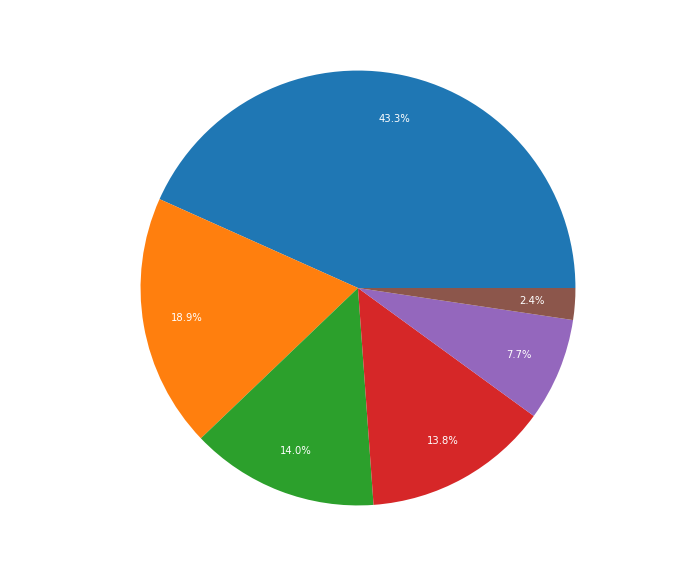

In [8]:
#Vemos graficamente cual es el rango etario mas recurrente
plt.figure(figsize=(10,10))
plt.pie(df_.Generación.value_counts(), labels = df_.Generación.value_counts().index,  labeldistance= 1.3, autopct='%1.1f%%',pctdistance=0.8, textprops={'color':"w"})
plt.box(False)
plt.show()

In [9]:
#Analizamos cuales son los locales que nuestro publico utiliza
np.unique (df_.shop_name.values)

array(['AIELLO', 'ALVEAR', 'ATOMO', 'CALIFORNIA', 'CARREFOUR',
       'CHANGOMAS', 'COMODIN', 'COOPERATIVA OBRERA', 'CORDIEZ', 'COTO',
       'DISCO', 'GOMEZ PARDO', 'JUMBO', 'KILGELMANN', 'KILLBEL',
       'LA ANONIMA', 'LA GALLEGA', 'LA REINA', 'LIBERTAD', 'MAKRO',
       'MONARCA', 'SUPER MAMI', 'TODO', 'TOLEDO', 'VEA', 'WALMART'],
      dtype=object)

In [10]:
#Analizams cuales son los locales mas concurridos por nuestros usuarios
df_.shop_name.value_counts()

CARREFOUR             207
COTO                  152
VEA                    82
CHANGOMAS              55
LA ANONIMA             50
JUMBO                  26
DISCO                  23
COOPERATIVA OBRERA     21
WALMART                14
SUPER MAMI              7
LA GALLEGA              6
ATOMO                   5
CORDIEZ                 4
LIBERTAD                4
TOLEDO                  4
MAKRO                   3
TODO                    3
ALVEAR                  2
AIELLO                  2
CALIFORNIA              2
LA REINA                2
MONARCA                 1
KILLBEL                 1
COMODIN                 1
GOMEZ PARDO             1
KILGELMANN              1
Name: shop_name, dtype: int64

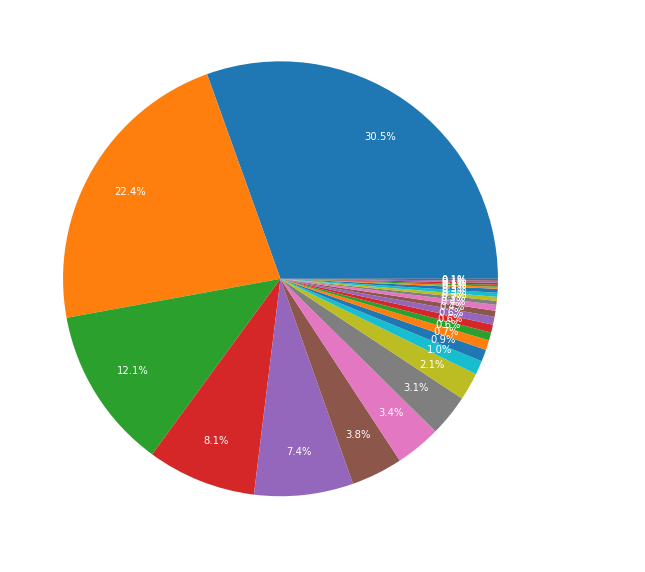

In [11]:
#Vemos graficamente cuales son los locales mas concurridos
plt.figure(figsize=(10,10))
plt.pie(df_.shop_name.value_counts(), labels = df_.shop_name.value_counts().index,  labeldistance= 1.3, autopct='%1.1f%%',pctdistance=0.8, textprops={'color':"w"})
plt.box(False)
plt.show()

In [12]:
#Ahora analizamos los locales mas concurridos por los milenials
df_M = df_[df_.Generación == 'Millenials']
df_M

,ticket_id,cliente_id,Buy Date,Buy Hour,Payment Total,shop_name,Sexo,Nro Adultos,Nro Niños,Mascota,Generación,Tipo de Hogar,Ciudad
2,3229841,101905534,24/01/2022,11:20:00,"20707,97",WALMART,Hombre,2,0,Gato,Millenials,parejas,San Justo
5,3234254,102193773,24/01/2022,18:23:00,80347,CORDIEZ,Mujer,2,1,Gato,Millenials,familias,Justo Daract
7,3236036,1097337,03/02/2022,19:01:00,457554,VEA,Hombre,4,0,Perro,Millenials,3 o mÃ¡s adultos,San Juan
10,3238547,102360987,03/02/2022,21:02:00,"2580,19",JUMBO,Hombre,1,0,Gato,Millenials,solteros,Florencio Varela
11,3239567,1173357,24/01/2022,12:48:00,"5739,05",CHANGOMAS,Hombre,2,2,Gato,Millenials,familias,Ramos Mejia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,3857857,101936307,04/03/2022,17:40:00,131807,VEA,Mujer,1,0,Gato,Millenials,solteros,Balnearia
824,3861592,1066681,23/02/2022,11:14:00,"1447,21",COTO,Hombre,2,0,0,Millenials,parejas,Vicente Casares
826,3866404,102754912,23/02/2022,16:24:00,"3155,2",CARREFOUR,Mujer,1,0,0,Millenials,solteros,Mendoza
831,3873049,1057064,23/02/2022,21:00:00,"4078,34",CARREFOUR,Hombre,2,0,0,Millenials,parejas,Victoria


In [13]:
df_M.shape

(294, 13)

In [14]:
#Analizo cuales son los locales mas concurridos por el pubico de mayor volumen
df_M.shop_name.value_counts()

CARREFOUR             85
COTO                  71
VEA                   36
CHANGOMAS             29
LA ANONIMA            24
JUMBO                 12
DISCO                  8
COOPERATIVA OBRERA     7
WALMART                6
LIBERTAD               3
CORDIEZ                2
ATOMO                  2
SUPER MAMI             2
LA GALLEGA             2
CALIFORNIA             1
MAKRO                  1
KILGELMANN             1
LA REINA               1
GOMEZ PARDO            1
Name: shop_name, dtype: int64

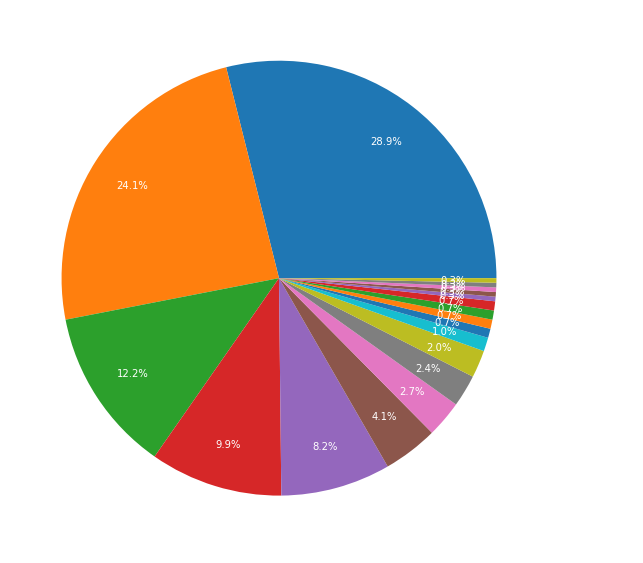

In [15]:
#Vemos graficamente cuales son los locales mas concurridos por el publico que mas nos consume 
plt.figure(figsize=(10,10))
plt.pie(df_M.shop_name.value_counts(), labels = df_M.shop_name.value_counts().index,  labeldistance= 1.3, autopct='%1.1f%%',pctdistance=0.8, textprops={'color':"w"})
plt.box(False)
plt.show()

In [16]:
df[['cliente_id']].duplicated().sum()
#Podemos ver que los clientes que volvieron a comprar solo lo hicieron una vez

156

In [17]:
df[['cliente_id']].loc[df[['cliente_id']].duplicated()]
#Encuentro los clientes que compraron dos veces en la primer campaña

,cliente_id
53,1168458
71,101957107
75,102094233
84,102615587
102,102295155
...,...
823,102163233
825,1057678
827,1078738
829,102697504


In [18]:
df_2 = df.loc[df[['cliente_id']].duplicated()]

In [19]:
#Analizo a que rango etario corresponden los clientes que volvieron a comprar dentro del mismo periodo
df_2.Generación.value_counts()

Millenials       62
GeneraciÃ³n X    37
sin info         22
GeneraciÃ³n Z    17
Baby Boomers     17
Otros             1
Name: Generación, dtype: int64

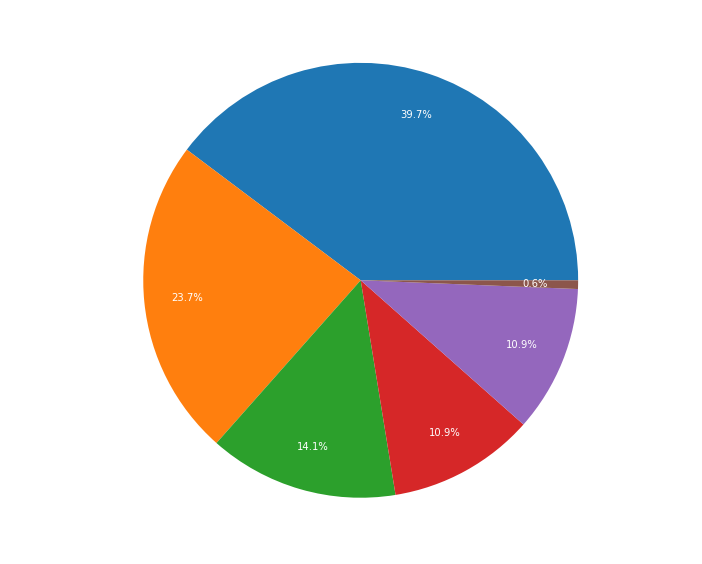

In [20]:
plt.figure(figsize=(10,10))
plt.pie(df_2.Generación.value_counts(), labels = df_2.Generación.value_counts().index,  labeldistance= 1.3, autopct='%1.1f%%',pctdistance=0.8, textprops={'color':"w"})
plt.box(False)
plt.show()

In [21]:
#Analizo donde compraron las personas que repitieron 
df_2.shop_name.value_counts()

CARREFOUR             41
COTO                  39
VEA                   27
LA ANONIMA            20
DISCO                  7
CHANGOMAS              5
WALMART                5
COOPERATIVA OBRERA     3
JUMBO                  3
TOLEDO                 2
GOMEZ PARDO            1
CORDIEZ                1
TODO                   1
MAKRO                  1
Name: shop_name, dtype: int64

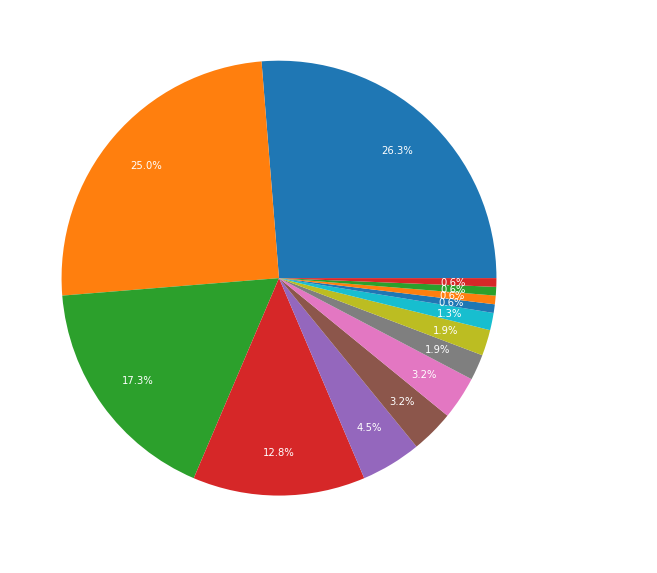

In [22]:
plt.figure(figsize=(10,10))
plt.pie(df_2.shop_name.value_counts(), labels = df_2.shop_name.value_counts().index,  labeldistance= 1.3, autopct='%1.1f%%',pctdistance=0.8, textprops={'color':"w"})
plt.box(False)
plt.show()

In [23]:
df_2.duplicated().sum()
#No se encuentran duplicados, lo que refleja que nadie repitio mas de una vez en este periodo

0

In [33]:
#Analizo la demografia de los consumidores
print(df_.Ciudad.value_counts().shape)
df_.Ciudad.value_counts().head(30)
#No puedo concluir nada con estos resultados mas alla de que los principales datos provienen de Buenos Aires

(196,)


Buenos Aires               117
sin info                    94
Cordoba                     29
Neuquen                     16
Rosario                     16
Parana                      13
Salta                       10
La Plata                    10
Mar Del Plata                9
Merlo                        8
Comodoro Rivadavia           8
San Miguel De Tucuman        8
General Roca                 7
Rio Cuarto                   7
Garin                        7
San Salvador De Jujuy        7
San Carlos De Bariloche      7
Banfield                     6
Bahia Blanca                 6
Mendoza                      6
Cipolletti                   5
Lomas De Zamora              5
Ramos Mejia                  5
Resistencia                  5
Rio Gallegos                 5
San Justo                    5
Rio Grande                   4
Concordia                    4
Temperley                    4
Las Heras                    4
Name: Ciudad, dtype: int64